<a href="https://colab.research.google.com/github/sanhiitaa/100-days-of-deep-learning/blob/main/transfer_learning_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
#  downloading the dataset
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:09<00:00, 108MB/s] 
100% 1.06G/1.06G [00:09<00:00, 116MB/s]


In [3]:
# unzipping the dataset
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
# importing libraries and VGG16 model
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt

In [5]:
# extracting the convolution layers from the VGG16  model
conv_base= VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# setting the last few convolutional parameters to be trainable - Fine tuning
conv_base.trainable=True

set_trainable=False

for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False
for layer in conv_base.layers:
  print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [7]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
# creating a sequential model with CNN layers (of VGG16) and defining FC layers
model= Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# generators
train_ds= keras.utils.image_dataset_from_directory(directory='/content/train',
                                                   labels='inferred',
                                                   label_mode='int',
                                                   batch_size=32,
                                                   image_size=(150,150))

validation_ds= keras.utils.image_dataset_from_directory(directory='/content/test',
                                                   labels='inferred',
                                                   label_mode='int',
                                                   batch_size=32,
                                                   image_size=(150,150))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
# normalize

def process(image, label):
  image=tf.cast(image/255, tf.float32)
  return image, label

  train_ds= train_ds.map(process)
  validation_ds= validation_ds.map(process)

### Optimizer- Adam

In [13]:
# compiling model - used Adam instead of RMS prop to observe performance changes
model.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 110ms/step - loss: 0.5547 - accuracy: 0.8916 - val_loss: 0.2139 - val_accuracy: 0.9282
Epoch 2/10
625/625 [==============================] - 64s 101ms/step - loss: 0.0958 - accuracy: 0.9692 - val_loss: 0.1977 - val_accuracy: 0.9358
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0207 - accuracy: 0.9957 - val_loss: 0.2075 - val_accuracy: 0.9398
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0064 - accuracy: 0.9993 - val_loss: 0.2173 - val_accuracy: 0.9416
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0033 - accuracy: 0.9998 - val_loss: 0.2247 - val_accuracy: 0.9438
Epoch 6/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 0.2333 - val_accuracy: 0.9430
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.2395 - val_ac

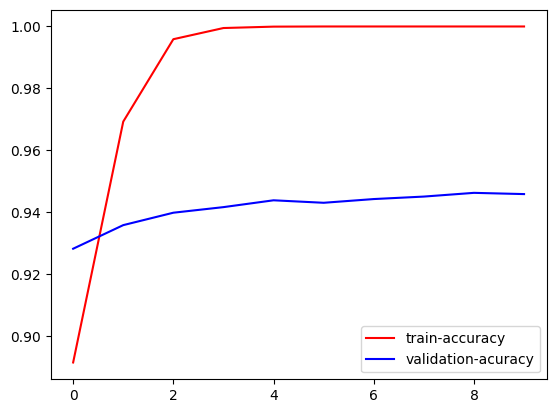

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train-accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation-acuracy')
plt.legend()
plt.show()

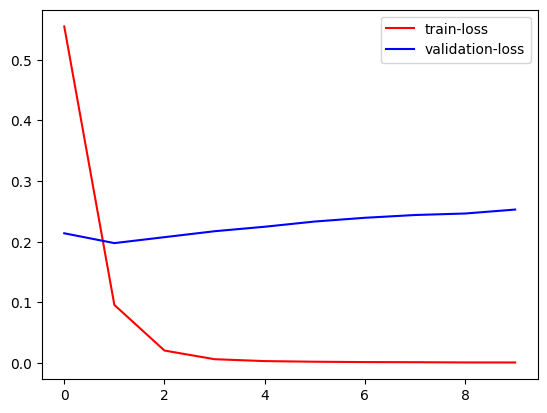

In [16]:
plt.plot(history.history['loss'],color='red',label='train-loss')
plt.plot(history.history['val_loss'],color='blue',label='validation-loss')
plt.legend()
plt.show()

### Optimizer- RMSprop

In [13]:
# creating a sequential model with CNN layers (of VGG16) and defining FC layers
model1= Sequential()

model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [14]:
# compiling model with RMSprop
model1.compile(optimizer=keras.optimizers.RMSprop(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history1 = model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 107ms/step - loss: 0.5389 - accuracy: 0.8978 - val_loss: 0.1915 - val_accuracy: 0.9378
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0890 - accuracy: 0.9692 - val_loss: 0.1920 - val_accuracy: 0.9462
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0211 - accuracy: 0.9939 - val_loss: 0.2095 - val_accuracy: 0.9516
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.2560 - val_accuracy: 0.9540
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.2500 - val_accuracy: 0.9578
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 7.4815e-04 - accuracy: 0.9998 - val_loss: 0.2682 - val_accuracy: 0.9578
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 5.6297e-04 - accuracy: 0.9998 - val_loss: 0.2695 

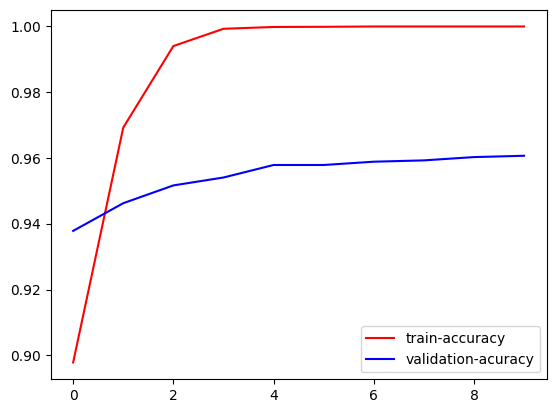

In [19]:
plt.plot(history1.history['accuracy'],color='red',label='train-accuracy')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation-acuracy')
plt.legend()
plt.show()

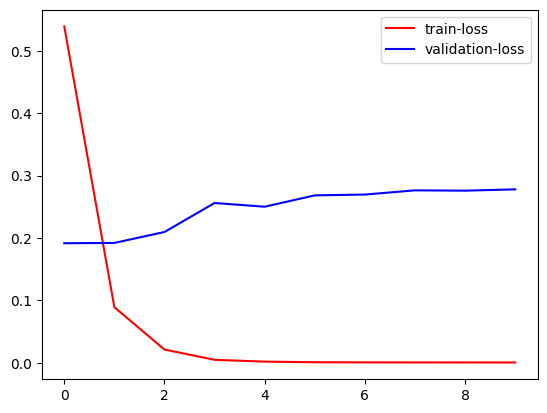

In [20]:
plt.plot(history1.history['loss'],color='red',label='train-loss')
plt.plot(history1.history['val_loss'],color='blue',label='validation-loss')
plt.legend()
plt.show()